# Homework 2

In this homework, we are gonna perform some EDA work on our browser history!

Extract & prepare your history dataset using: `https://github.com/msaricaumbc/DS601/blob/main/Week09/homework/preparation_BrowserHistory.ipynb`

DO NOT commit your history dataset!

Watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned main.csv')
df.shape

(2326, 2)

In [3]:
df.head()

,Time,domain
0,2024-09-18 18:38:23,chatgpt.com
1,2024-09-18 18:26:40,chatgpt.com
2,2024-09-18 18:26:11,www.google.com
3,2024-09-18 18:26:10,google.com
4,2024-09-18 18:26:10,google.com


In [4]:
df.tail()

,Time,domain
2321,1600-12-31 19:00:00,www.youtube.com
2322,1600-12-31 19:00:00,www.youtube.com
2323,1600-12-31 19:00:00,www1.go123movies.io
2324,1600-12-31 19:00:00,www1.subsmovies.nz
2325,1600-12-31 19:00:00,www3.the123movies.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

215

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])
df.sample(10)

,Time,domain
2054,2024-08-21 09:59:19,accounts.google.com
44,2024-09-17 23:11:35,www.youtube.com
1606,2024-08-28 01:23:33,www.linkedin.com
1407,2024-08-29 16:29:18,emit.fa.ca3.oraclecloud.com
1611,2024-08-28 01:22:11,www.linkedin.com
1549,2024-08-28 16:02:06,csprd-web.ps.umbc.edu
714,2024-09-07 19:25:27,www.linkedin.com
1267,2024-08-30 22:54:18,www.linkedin.com
958,2024-09-07 15:09:38,www.instagram.com
574,2024-09-08 23:12:20,neetcode.io


In [11]:
df['domain'] = df['domain'].astype(str)
df.sample(1)

,Time,domain
916,2024-09-07 15:12:00,www.instagram.com


In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2024-09-18 18:38:23,chatgpt.com
1,2024-09-18 18:26:40,chatgpt.com
2,2024-09-18 18:26:11,www.google.com
3,2024-09-18 18:26:10,google.com
4,2024-09-18 18:26:10,google.com


In [14]:
df['domain'].value_counts()[:50]

www.linkedin.com                379
www.youtube.com                 322
www.google.co.in                133
www.instagram.com               115
chatgpt.com                      98
accounts.google.com              81
webauth.umbc.edu                 76
api-4f567d87.duosecurity.com     70
www.google.com                   50
auth0.openai.com                 31
careers-ecslimited.icims.com     26
csprd-web.ps.umbc.edu            26
recruiting2.ultipro.com          23
www.amazon.com                   22
my.umbc.edu                      19
mail.google.com                  18
www.overleaf.com                 18
my3.my.umbc.edu                  17
smartapply.indeed.com            16
myactivity.google.com            16
neetcode.io                      15
blackboard.umbc.edu              15
www.geeksforgeeks.org            15
apply-arco.icims.com             14
docs.google.com                  12
www.chess.com                    12
us06web.zoom.us                  11
emit.fa.ca3.oraclecloud.com 

<Axes: >

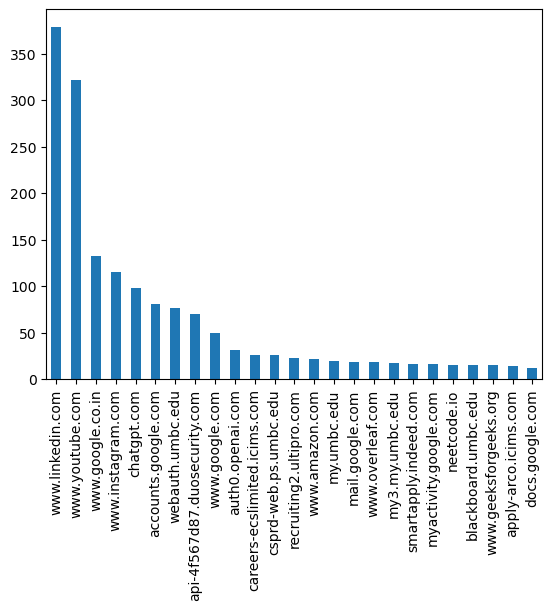

In [15]:
# top 25 sites that I visisted
df['domain'].value_counts()[:25].plot(kind='bar')

In [16]:
#Understanding usage at different hours
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     120
1     153
2      38
3      11
5       8
6      27
7       4
8      18
9      62
10    133
11     44
12     91
13     71
14     79
15    111
16    187
17    188
18    153
19    152
20    102
21     56
22    129
23    174
Name: domain, dtype: int64

<Axes: xlabel='Time'>

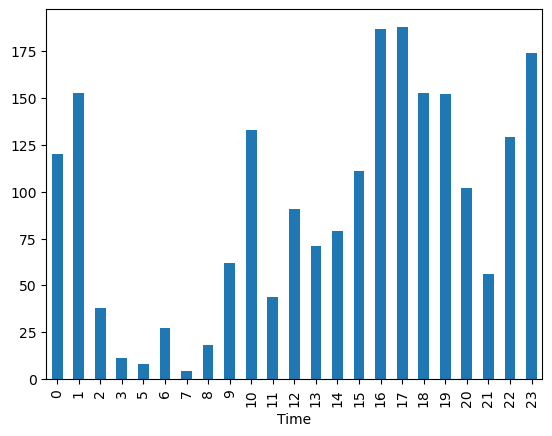

In [17]:
#plotting the bar chart to identify usage pattern
hourly_counts.plot.bar()

In [18]:
#Adding name of the day to find a usage pattern in week
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2024-09-18 18:38:23,chatgpt.com,Wednesday,2
1,2024-09-18 18:26:40,chatgpt.com,Wednesday,2
2,2024-09-18 18:26:11,www.google.com,Wednesday,2
3,2024-09-18 18:26:10,google.com,Wednesday,2
4,2024-09-18 18:26:10,google.com,Wednesday,2


In [19]:
#Getting a usage value for different days 
df['Day'].value_counts()

Saturday     487
Wednesday    470
Monday       260
Friday       244
Sunday       240
Thursday     220
Tuesday      190
Name: Day, dtype: int64

In [20]:
#Sorting the values in order to display with notations of different days
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    260
1    190
2    470
3    220
4    244
5    487
6    240
Name: DayIndex, dtype: int64

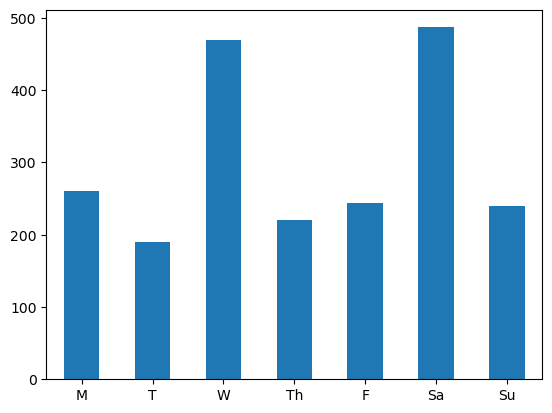

In [21]:
#plotting the graph
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
#Filtering weekends
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.sample()

,Time,domain,Day,DayIndex,isWeekend
1872,2024-08-24 13:18:43,www.calculator.net,Saturday,5,True


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
189,2024-09-15 22:44:37,app.grammarly.com,Sunday,6,True
190,2024-09-15 22:44:33,www.grammarly.com,Sunday,6,True
191,2024-09-15 22:44:33,app.grammarly.com,Sunday,6,True
192,2024-09-15 22:44:32,www.google.co.in,Sunday,6,True
193,2024-09-15 22:31:13,www.google.co.in,Sunday,6,True


In [25]:
#counting the weekday values
weekday['domain'].value_counts()[:5]

www.linkedin.com    235
www.youtube.com     189
www.google.co.in     99
webauth.umbc.edu     73
chatgpt.com          67
Name: domain, dtype: int64

In [26]:
#counting the weekend values
weekend['domain'].value_counts()[:15]

www.linkedin.com                144
www.youtube.com                 133
www.instagram.com               115
www.google.co.in                 34
chatgpt.com                      31
careers-ecslimited.icims.com     26
www.amazon.com                   21
accounts.google.com              15
mail.google.com                  11
www.google.com                    9
neetcode.io                       8
jobs.jobvite.com                  7
pythontutor.com                   7
www.geeksforgeeks.org             6
acrobat.adobe.com                 6
Name: domain, dtype: int64

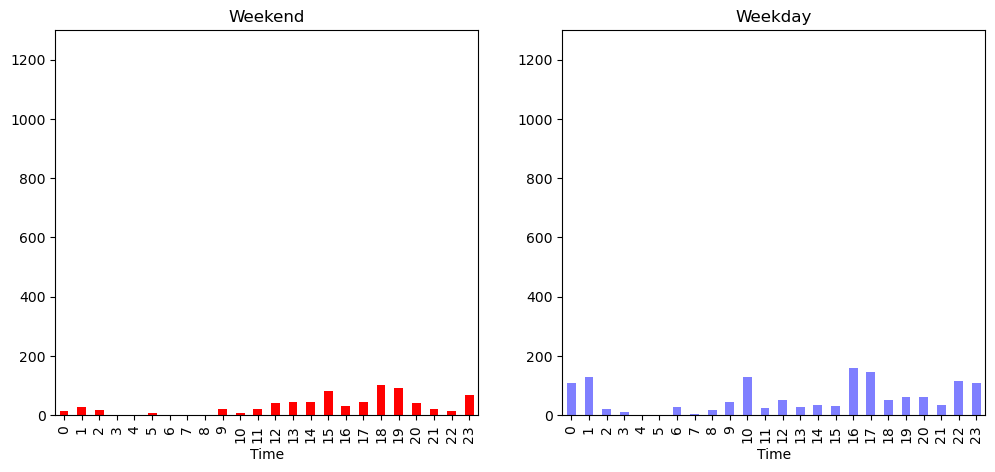

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


Be skeptical!

Am I on computer a lot more on the weekdays or it shows more simply because there are more weekdays 

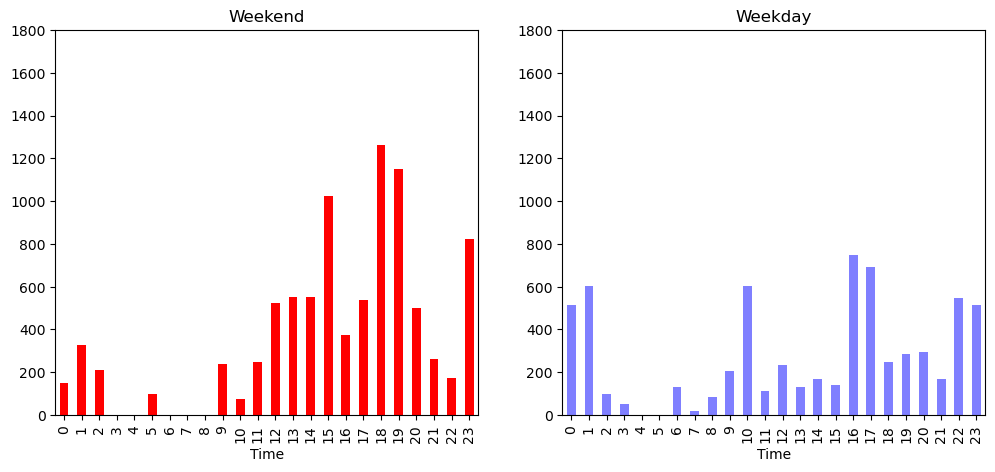

In [28]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

This shows that I am way more active weekends.

In [29]:
df['domain'].value_counts()[:10]

www.linkedin.com                379
www.youtube.com                 322
www.google.co.in                133
www.instagram.com               115
chatgpt.com                      98
accounts.google.com              81
webauth.umbc.edu                 76
api-4f567d87.duosecurity.com     70
www.google.com                   50
auth0.openai.com                 31
Name: domain, dtype: int64

In [44]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]


In [45]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

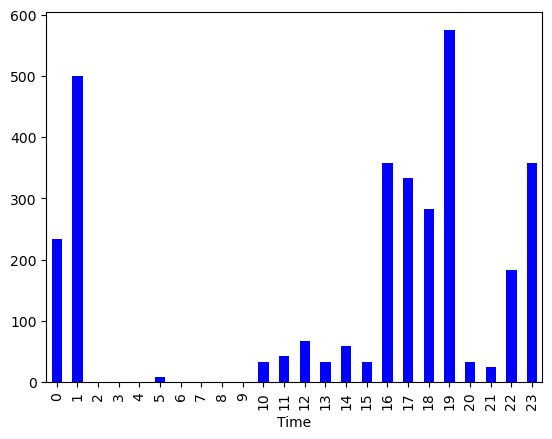

In [46]:
#LinkedIn usage

_= show_domain_stats('linkedin', 'blue')

In [33]:
#LinkedIn is used mostly at evening time to apply or network

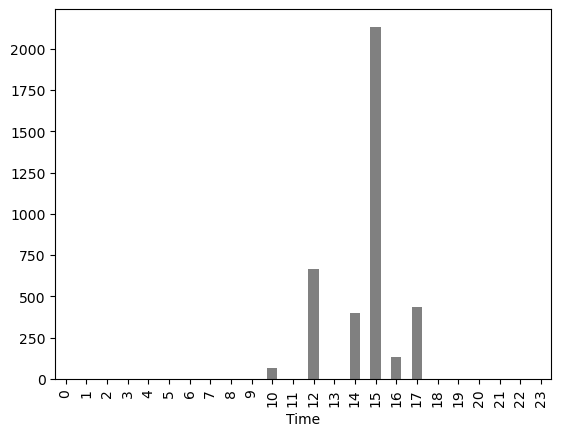

In [47]:
#Instagram usage#LinkedIn usage
_= show_domain_stats('instagram', 'grey')

In [48]:
#Instagram pattern shows limited usage.

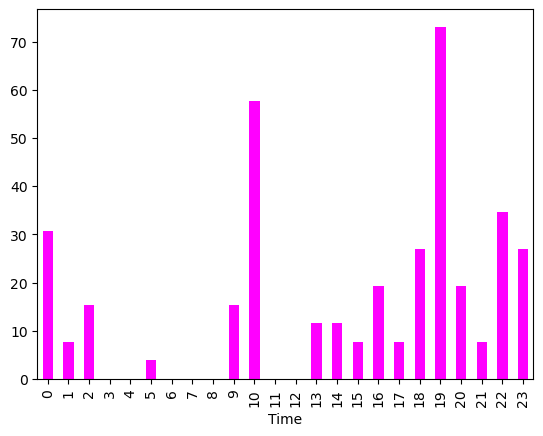

In [49]:
#CHATGPT usage
_ = show_domain_stats('chatgpt', 'magenta')


In [50]:
#Chat gpt usage is significant during evening time this could be used for learning and exploring new stuff.


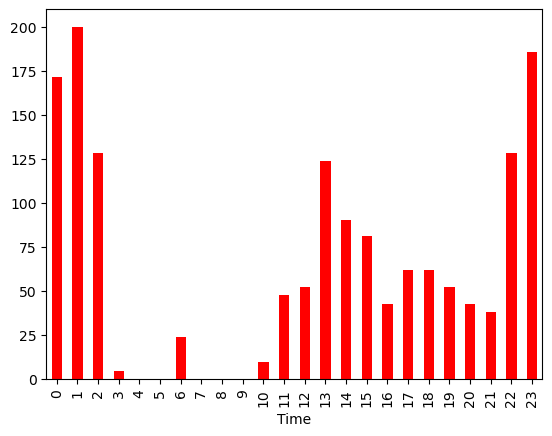

In [51]:
# Youtube Usage
_ = show_domain_stats('youtube', 'red')

In [52]:
#Youtube utilization suggests that youtube is used almost at all times except when the user could be sleeping 

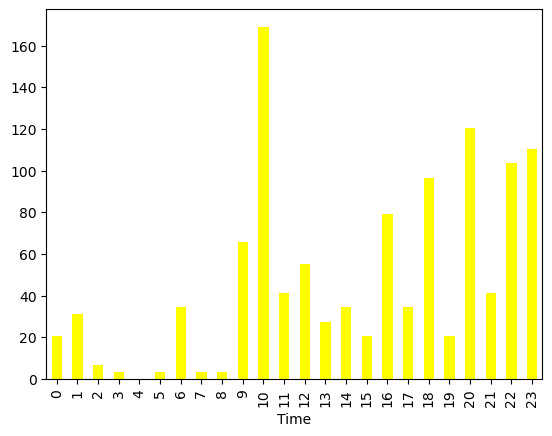

In [53]:
#Google usage
_ = show_domain_stats('google', 'yellow')

In [54]:
#Signigicant Google visits suggests that user is frequently  trying get information about differnet things. 

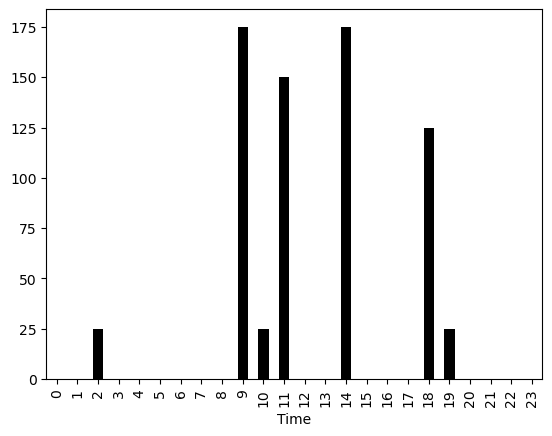

In [55]:
#Amazon Usage
_=show_domain_stats('amazon', 'black')

In [56]:
#Amazon usage shows very limited usage. This suggests that user is not a frequent shopper.

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is user employed?
1. What is his interests?
1. Anything interesting? 

1. Based on the frequent vists to Instagram, GlassDoor, and UMBC. This shows that this might be a personal Computer as people generally do not access instagram through their work laptop. Additionally visits to UMBC and activity during weekends and late nights suggest that this might be a personal laptop


2. Is user employed?
As most of the activity is on LinkedIn it can be assummed that user can be just networking but visits to various recruiting websites it can be assumed that the user is currently not employed.

3. What is his interests?
It looks like the user only uses youtube a lot for entertainment. Additionally, visits to NeetCode, Geeks for geeks and chat GPT suggest that the user might be interested in coding and learning things right now 


4. 
-> There were multiple visits to accounts.google.com suggest that this is an academic account and the user has multiple accounts for different purposes
-> Multiple visits to umbc authentication website can also be seen to log in to myumbc portal which shows network security 